# Packages

In [7]:
!pip install catboost


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------------- -------------------------- 2.9/8.7 MB 19.1 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 24.6 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 21.5 MB/s  0:00:00

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Data

In [12]:
data_cleaned = pd.read_csv(r'C:\Users\natal\Github\Analise-de-Predicao-Obito-Sifilis-Congenita\data\clean_data.csv', encoding='latin1')

C:\Users\natal\AppData\Local\Temp\ipykernel_13908\2131881834.py:1: DtypeWarning: Columns (14,19,36,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data_cleaned = pd.read_csv(r'C:\Users\natal\Github\Analise-de-Predicao-Obito-Sifilis-Congenita\data\clean_data.csv', encoding='latin1')


In [13]:
data_cleaned.head()

,Unnamed: 0,tp_not,sem_not,id_agravo,dt_notific,nu_ano,sg_uf_not,id_municip,id_regiona,dt_diag,...,cli_icteri,cli_rinite,cli_anemia,cli_esplen,hepato,cli_osteo,lesoes,cli_outro,sin_outr_e,cli_pseudo
0,1,2,201334.0,A509,2013-08-22,2013,42,420395,1555.0,2007-12-01,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,ENCEFALOPATIA,2.0
1,2,2,1307.0,A509,2013-02-15,2013,33,330510,NaN,2008-10-31,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0
2,3,2,201326.0,A509,2013-06-24,2013,33,330350,NaN,2009-04-21,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0
3,4,2,201315.0,A509,2013-04-08,2013,24,240810,1416.0,2010-04-24,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0
4,5,2,201323.0,A509,2013-06-06,2013,33,330350,NaN,2010-07-31,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0


In [14]:
data_cleaned.shape

(251659, 65)

In [15]:
data_cleaned.columns = data_cleaned.columns.str.upper()

In [16]:
# Create outcome columns (death from congenital syphilis, miscarriage and stillbirth) based on EVOLUCAO
data_cleaned['OBITO_SIFILIS'] = data_cleaned['EVOLUCAO'].apply(lambda x: 1 if x == 2 else 0)
data_cleaned['ABORTO'] = data_cleaned['EVOLUCAO'].apply(lambda x: 1 if x == 4 else 0)
data_cleaned['NATIMORTO'] = data_cleaned['EVOLUCAO'].apply(lambda x: 1 if x == 5 else 0)

In [17]:
data_cleaned.shape

(251659, 68)

# Data cleaning

In [18]:
# Step 1: Remove all columns representing date
# Identify columns that begin with 'DT'
columns_with_dt = [col for col in data_cleaned.columns if col.startswith('DT')]

data_cleaned = data_cleaned.drop(columns=columns_with_dt)

print("Removed columns that begin with 'DT':", columns_with_dt)
print("Remaining columns in the dataset:", data_cleaned.columns)

Removed columns that begin with 'DT': ['DT_NOTIFIC', 'DT_DIAG', 'DT_OBITO']
Remaining columns in the dataset: Index(['UNNAMED: 0', 'TP_NOT', 'SEM_NOT', 'ID_AGRAVO', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'SEM_DIAG', 'NU_IDADE_N', 'CS_SEXO',
       'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI',
       'ID_RG_RESI', 'ID_PAIS', 'ANT_IDADE', 'ANT_RACA', 'ID_OCUPA_N',
       'ESCOLMAE', 'ANT_PRE_NA', 'UF_PRE_NAT', 'MUN_PRE_NA', 'ANTSIFIL_N',
       'LAB_PARTO', 'LAB_TITU_2', 'LAB_DT3', 'LAB_CONF', 'TRA_ESQUEM',
       'TRA_DT', 'ANT_TRATAD', 'ANT_UF_CRI', 'ANT_MUNI_C', 'LABC_SANGU',
       'LABC_TIT_1', 'LABC_DT_1', 'LABC_IGG', 'LABC_DT', 'LABC_LIQUO',
       'LABC_TIT_2', 'LABC_DT_2', 'LABC_TITUL', 'LABC_EVIDE', 'LABC_LIQ_1',
       'TRA_DIAG_T', 'TRA_ESQU_1', 'DS_ESQUEMA', 'EVOLUCAO', 'EVO_DIAG_N',
       'TRA_DIAG_C', 'CLI_ICTERI', 'CLI_RINITE', 'CLI_ANEMIA', 'CLI_ESPLEN',
       'HEPATO', 'CLI_OSTEO', 'LESOES', 'CLI_OUTRO', 'SIN_OUTR_E',
       'CLI_PSE

In [19]:
# Step 2: Remove columns representing laboratory data because they will certainly be related to the outcome
# Identify columns that begin with 'LAB'
columns_with_lab = [col for col in data_cleaned.columns if col.startswith('LAB')]

data_cleaned = data_cleaned.drop(columns=columns_with_lab)

print("Removed columns that begin with 'LAB':", columns_with_lab)
print("Remaining columns in the dataset:", data_cleaned.columns)

Removed columns that begin with 'LAB': ['LAB_PARTO', 'LAB_TITU_2', 'LAB_DT3', 'LAB_CONF', 'LABC_SANGU', 'LABC_TIT_1', 'LABC_DT_1', 'LABC_IGG', 'LABC_DT', 'LABC_LIQUO', 'LABC_TIT_2', 'LABC_DT_2', 'LABC_TITUL', 'LABC_EVIDE', 'LABC_LIQ_1']
Remaining columns in the dataset: Index(['UNNAMED: 0', 'TP_NOT', 'SEM_NOT', 'ID_AGRAVO', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'SEM_DIAG', 'NU_IDADE_N', 'CS_SEXO',
       'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI',
       'ID_RG_RESI', 'ID_PAIS', 'ANT_IDADE', 'ANT_RACA', 'ID_OCUPA_N',
       'ESCOLMAE', 'ANT_PRE_NA', 'UF_PRE_NAT', 'MUN_PRE_NA', 'ANTSIFIL_N',
       'TRA_ESQUEM', 'TRA_DT', 'ANT_TRATAD', 'ANT_UF_CRI', 'ANT_MUNI_C',
       'TRA_DIAG_T', 'TRA_ESQU_1', 'DS_ESQUEMA', 'EVOLUCAO', 'EVO_DIAG_N',
       'TRA_DIAG_C', 'CLI_ICTERI', 'CLI_RINITE', 'CLI_ANEMIA', 'CLI_ESPLEN',
       'HEPATO', 'CLI_OSTEO', 'LESOES', 'CLI_OUTRO', 'SIN_OUTR_E',
       'CLI_PSEUDO', 'OBITO_SIFILIS', 'ABORTO', 'NATIMORTO'],
      dtyp

In [20]:
# Step 3: Remove columns that start with 'ID'

# Columns that start with "ID"
id_columns = [col for col in data_cleaned.columns if col.startswith('ID')]
print("Columns that start with 'ID':", id_columns)

data_cleaned = data_cleaned.drop(columns=id_columns)

print("Columns remaining in the dataset after removing columns that start with 'ID':")
print(data_cleaned.columns)

Columns that start with 'ID': ['ID_AGRAVO', 'ID_MUNICIP', 'ID_REGIONA', 'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'ID_OCUPA_N']
Columns remaining in the dataset after removing columns that start with 'ID':
Index(['UNNAMED: 0', 'TP_NOT', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT', 'SEM_DIAG',
       'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF',
       'ANT_IDADE', 'ANT_RACA', 'ESCOLMAE', 'ANT_PRE_NA', 'UF_PRE_NAT',
       'MUN_PRE_NA', 'ANTSIFIL_N', 'TRA_ESQUEM', 'TRA_DT', 'ANT_TRATAD',
       'ANT_UF_CRI', 'ANT_MUNI_C', 'TRA_DIAG_T', 'TRA_ESQU_1', 'DS_ESQUEMA',
       'EVOLUCAO', 'EVO_DIAG_N', 'TRA_DIAG_C', 'CLI_ICTERI', 'CLI_RINITE',
       'CLI_ANEMIA', 'CLI_ESPLEN', 'HEPATO', 'CLI_OSTEO', 'LESOES',
       'CLI_OUTRO', 'SIN_OUTR_E', 'CLI_PSEUDO', 'OBITO_SIFILIS', 'ABORTO',
       'NATIMORTO'],
      dtype='object')


In [21]:
# Step 4: Remove columns that don't make sense to consider
# List of columns to remove
columns_to_remove = [
'TP_NOT', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT', 'CS_SEXO', 'SG_UF',
'ANT_UF_CRI', 'ANT_MUNI_C', 'EVOLUCAO', 'EVO_DIAG_N', 'CLI_OUTRO', 'ANO',
'TRA_DT', 'SEM_DIAG', 'DS_ESQUEMA', 'SIN_OUTR_E', 'UNNAMED: 0', 'TRA_DIAG_C'
]

data_cleaned = data_cleaned.drop(columns=columns_to_remove, errors='ignore')

print("Columns remaining in the dataset after removal:")
print(data_cleaned.columns)

Columns remaining in the dataset after removal:
Index(['NU_IDADE_N', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'ANT_IDADE',
       'ANT_RACA', 'ESCOLMAE', 'ANT_PRE_NA', 'UF_PRE_NAT', 'MUN_PRE_NA',
       'ANTSIFIL_N', 'TRA_ESQUEM', 'ANT_TRATAD', 'TRA_DIAG_T', 'TRA_ESQU_1',
       'CLI_ICTERI', 'CLI_RINITE', 'CLI_ANEMIA', 'CLI_ESPLEN', 'HEPATO',
       'CLI_OSTEO', 'LESOES', 'CLI_PSEUDO', 'OBITO_SIFILIS', 'ABORTO',
       'NATIMORTO'],
      dtype='object')


In [22]:
# Step 5: Remove the geographic location variables from prenatal care
# These variables represent the municipality and state where prenatal care was provided,
# and introduce additional complexity that does not directly contribute to the analysis of the
# clinical factors associated with congenital syphilis. Conclusions about the impact of geographic location
# are difficult to draw without a more in-depth analysis, so we chose
# to remove them to focus on variables directly related to the clinical outcome.

# List of columns to be removed in Step 5
columns_to_remove_step_5 = ['MUN_PRE_NA', 'UF_PRE_NAT']

data_cleaned = data_cleaned.drop(columns=columns_to_remove_step_5, errors='ignore')

print("Columns remaining in the dataset after removing Step 5:")
print(data_cleaned.columns)

Columns remaining in the dataset after removing Step 5:
Index(['NU_IDADE_N', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'ANT_IDADE',
       'ANT_RACA', 'ESCOLMAE', 'ANT_PRE_NA', 'ANTSIFIL_N', 'TRA_ESQUEM',
       'ANT_TRATAD', 'TRA_DIAG_T', 'TRA_ESQU_1', 'CLI_ICTERI', 'CLI_RINITE',
       'CLI_ANEMIA', 'CLI_ESPLEN', 'HEPATO', 'CLI_OSTEO', 'LESOES',
       'CLI_PSEUDO', 'OBITO_SIFILIS', 'ABORTO', 'NATIMORTO'],
      dtype='object')


# Data manipulation

In [30]:
# Separate categorical and numeric variables
categorical_features = ['CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'ANT_RACA', 'ESCOLMAE', 'ANT_PRE_NA',
                        'ANTSIFIL_N', 'TRA_ESQUEM', 'ANT_TRATAD', 'TRA_DIAG_T', 'TRA_ESQU_1',
                        'CLI_ICTERI', 'CLI_RINITE', 'CLI_ANEMIA', 'CLI_ESPLEN','HEPATO',
                        'CLI_OSTEO', 'LESOES', 'CLI_PSEUDO']

numerical_features = [col for col in data_cleaned.columns if col not in categorical_features + ['OBITO_SIFILIS', 'ABORTION', 'STILLBORN']]

# Create copies of the variable lists to avoid modifications to the original (and to be used in another implementation)
categorical_features_rm = categorical_features.copy()
numerical_features_rm = numerical_features.copy()

# Create copies of the variable lists to preserve them
original_categorical_features = categorical_features.copy()
original_numerical_features = numerical_features.copy()

# Check the copies for verification
print("Copy of original categorical variables:", original_categorical_features)
print("Copy of original numerical variables:", original_numerical_features)

Copy of original categorical variables: ['CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'ANT_RACA', 'ESCOLMAE', 'ANT_PRE_NA', 'ANTSIFIL_N', 'TRA_ESQUEM', 'ANT_TRATAD', 'TRA_DIAG_T', 'TRA_ESQU_1', 'CLI_ICTERI', 'CLI_RINITE', 'CLI_ANEMIA', 'CLI_ESPLEN', 'HEPATO', 'CLI_OSTEO', 'LESOES', 'CLI_PSEUDO']
Copy of original numerical variables: ['NU_IDADE_N', 'ANT_IDADE', 'ABORTO', 'NATIMORTO']


In [31]:
X = data_cleaned.drop(columns=['OBITO_SIFILIS', 'ABORTO', 'NATIMORTO'])
y = data_cleaned['OBITO_SIFILIS'] # Initial target (can be changed to 'ABORTO' or 'NATIMORTO')

# Balancing

In [26]:
!pip install imblearn


   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-l


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from imblearn.under_sampling import RandomUnderSampler

In [28]:
# Apply down centering
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [32]:
# Convert categorical variables to strings after undersampling
# Since the numbers in these categorical variables are just labels and have no ordinal meaning, converting to strings is the correct approach.
for col in categorical_features:
    X_resampled[col] = X_resampled[col].astype(str)

# Train e Test

In [33]:
# Split balanced data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Variables

In [34]:
for idx, col in enumerate(X_train.columns):
    print(f"{idx}: {col}")

0: NU_IDADE_N
1: CS_GESTANT
2: CS_RACA
3: CS_ESCOL_N
4: ANT_IDADE
5: ANT_RACA
6: ESCOLMAE
7: ANT_PRE_NA
8: ANTSIFIL_N
9: TRA_ESQUEM
10: ANT_TRATAD
11: TRA_DIAG_T
12: TRA_ESQU_1
13: CLI_ICTERI
14: CLI_RINITE
15: CLI_ANEMIA
16: CLI_ESPLEN
17: HEPATO
18: CLI_OSTEO
19: LESOES
20: CLI_PSEUDO


# TRADUÇÃO PARA O INGLÊS ATÉ AQUI:

0: NU_IDADE_N

1: CS_GESTANT

2: CS_RACA

3: CS_ESCOL_N


**Descrição das variáveis**

ANT_IDADE - Idade da mãe, por ocasião da notificação do
caso. Permite digitação.

ANT_RACA - 1 – branca
2 – preta
3 – amarela
4 – parda
5 – indígena
9 – ignorado

ESCOLMAE - Escolaridade da mãe no momento da
notificação do caso

ANT_PRE_NA - Informa se a mãe realizou pré-natal durante a
gravidez do caso notificado.

ANTSIFIL_N - 1. durante o pré-natal
2. no momento do
parto/curetagem
3. após o parto
4. não realizado
9. ignorado.

TRA_ESQUEM - 1. adequado
2. inadequado
3. não realizado
9. Ignorado

ANT_TRATAD - Informa sobre tratamento para sífilis do(s)
parceiro(s) da mãe do caso notificado.

TRA_DIAG_T - Diagnóstico de alterações ósseas
observáveis ao Rx, tais como osteocondrite,
osteoartrite, periostite (diafisite produtiva),
rarefação óssea, tíbia em “lâmina de sabre”.

TRA_ESQU_1 - Esquema terapêutico utilizado para o
tratamento da sífilis congênita do caso
notificado, ao nível hospitalar ou
ambulatorial. A Penicilina Cristalina é
administrada por via intravenosa, e as
Penicilinas Procaína e Benzatina
administradas por via intramuscular.

CLI_ICTERI - Presença de icterícia ao exame físico da
criança.

CLI_RINITE - Presença de rinite muco-sanguinolenta
observada ao exame físico da criança.

CLI_ANEMIA - Presença de anemia ao exame físico da
criança.

CLI_ESPLEN - Presença de baço aumentado de tamanho
ao exame físico da criança.

HEPATO - Presença de fígado aumentado de tamanho
ao exame físico da criança.

CLI_OSTEO - Presença de lesões osteoarticulares
dolorosas à manipulação da criança.

LESOES - Presença de: lesões bolhosas e/ou
descamativas; lesões papulares ou
manchas generalizadas de pele, incluindo
palma das mãos e planta dos pés; fissuras
ao redor dos orifícios naturais da criança.

CLI_PSEUDO - Presença de “paralisia” antálgica,
observada principalmente à manipulação da
criança, como nas trocas de fraldas.

# Catboost

In [ ]:
# Atualizar os índices das variáveis categóricas para os dados balanceados
cat_features_indices = [X_train.columns.get_loc(col) for col in categorical_features]

In [ ]:
# Treinamento do modelo CatBoost
catboost_model = CatBoostClassifier(iterations=100, random_seed=42, verbose=0)
catboost_model.fit(X_train, y_train, cat_features=cat_features_indices)

In [ ]:
# Previsões e métricas para o CatBoost
y_pred_catboost = catboost_model.predict(X_test)
print("Métricas do CatBoost para OBITO_SIFILIS:")
print(classification_report(y_test, y_pred_catboost))

Métricas do CatBoost para OBITO_SIFILIS:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1110
           1       0.81      0.74      0.77      1085

    accuracy                           0.79      2195
   macro avg       0.79      0.79      0.79      2195
weighted avg       0.79      0.79      0.79      2195



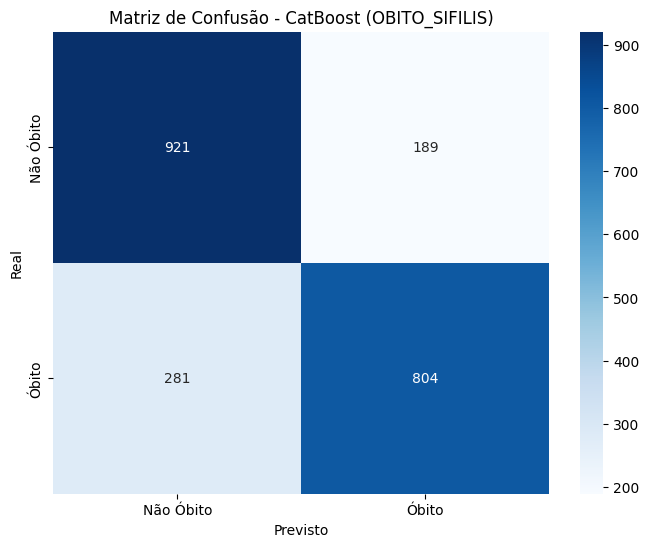

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de Confusão para o CatBoost
cm_catboost = confusion_matrix(y_test, y_pred_catboost)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_catboost, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Óbito', 'Óbito'], yticklabels=['Não Óbito', 'Óbito'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - CatBoost (OBITO_SIFILIS)')
plt.show()

In [ ]:
# Obter as importâncias das features no CatBoost
feature_importances = catboost_model.get_feature_importance(prettified=True)
print(feature_importances)

    Feature Id  Importances
0   TRA_ESQU_1    15.529707
1       HEPATO    14.409918
2   TRA_DIAG_T     8.849787
3    ANT_IDADE     7.695117
4       LESOES     7.150910
5   NU_IDADE_N     6.153236
6   CLI_ANEMIA     5.795210
7   ANTSIFIL_N     4.990804
8   ANT_PRE_NA     4.435123
9   CS_GESTANT     4.421040
10  TRA_ESQUEM     4.013049
11    ESCOLMAE     2.676095
12  ANT_TRATAD     2.674249
13  CLI_ESPLEN     2.432704
14  CLI_RINITE     2.055615
15    ANT_RACA     1.883204
16   CLI_OSTEO     1.735326
17  CLI_PSEUDO     1.181978
18     CS_RACA     1.057138
19  CLI_ICTERI     0.553409
20  CS_ESCOL_N     0.306381


In [ ]:
###### gráfico shap
###### descrição das variáveis
###### svm e xgboost

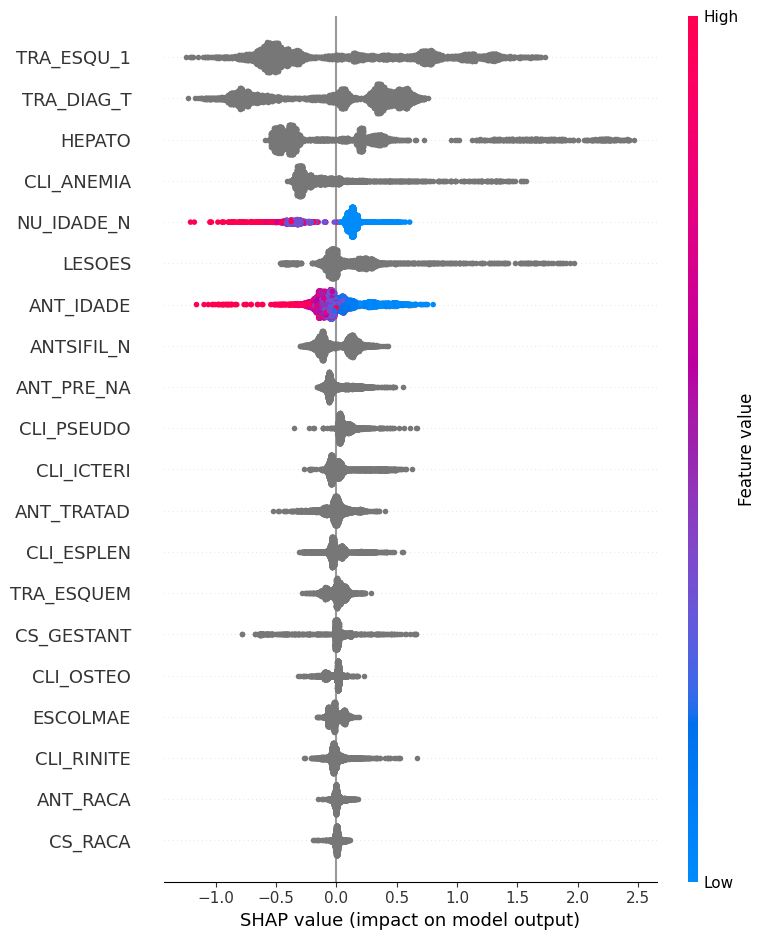

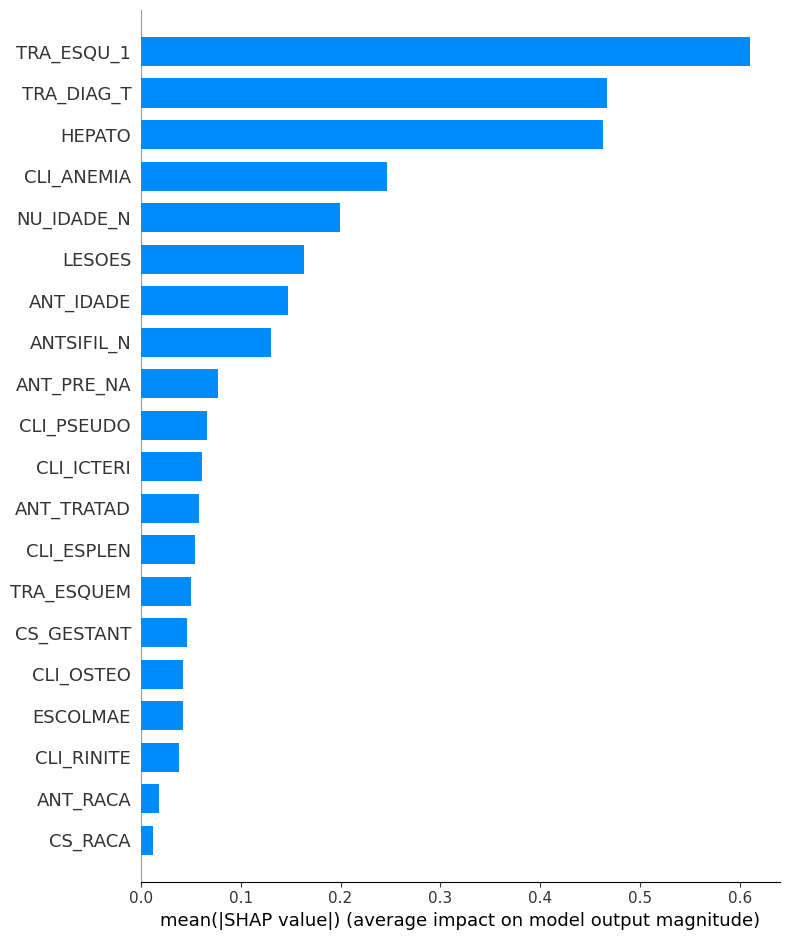

In [ ]:
import shap
import matplotlib.pyplot as plt

# Crie o objeto explainer baseado no modelo
explainer = shap.TreeExplainer(catboost_model)

# Calcule os valores SHAP (para o conjunto de dados usado no treino, por exemplo X_train)
shap_values = explainer.shap_values(X_train)

# Gráfico resumo (mais comum)
shap.summary_plot(shap_values, X_train)

# Se quiser também o gráfico de barras das importâncias médias (versão SHAP)
shap.summary_plot(shap_values, X_train, plot_type="bar")


# Random Forest

In [ ]:
# 2. Random Forest Model com OneHotEncoder

for col in categorical_features_rm:
    data_cleaned[col] = data_cleaned[col].astype(str)

from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder para variáveis categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(data_cleaned[categorical_features_rm])

import pandas as pd
X_categorical_encoded = pd.DataFrame(X_categorical_encoded, columns=encoder.get_feature_names_out(categorical_features_rm))
X_categorical_encoded.index = data_cleaned.index  # Alinhar o índice com o conjunto original

In [ ]:
# Concatenar variáveis numéricas e categóricas codificadas
X_full = pd.concat([data_cleaned[numerical_features_rm], X_categorical_encoded], axis=1)
y = data_cleaned['OBITO_SIFILIS']  # Modifique conforme o alvo desejado

In [ ]:
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_full, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report

y_pred_rf = rf_model.predict(X_test)
print("Métricas do Random Forest para OBITO_SIFILIS:")
print(classification_report(y_test, y_pred_rf))

Métricas do Random Forest para OBITO_SIFILIS:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1084
           1       0.77      0.75      0.76      1018

    accuracy                           0.77      2102
   macro avg       0.77      0.77      0.77      2102
weighted avg       0.77      0.77      0.77      2102



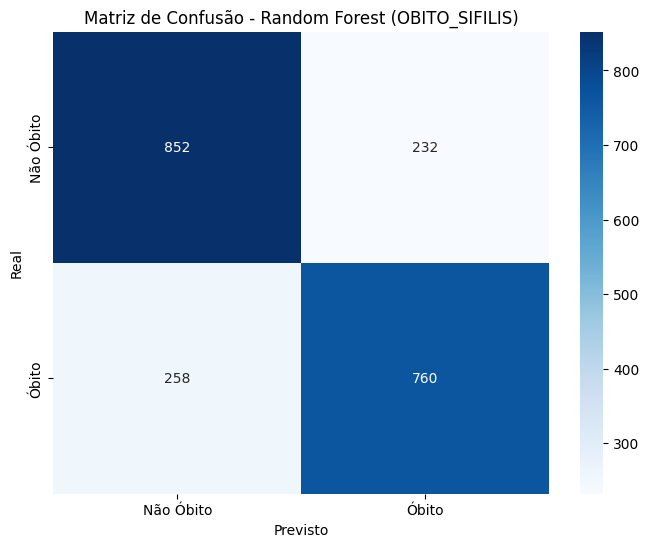

In [ ]:
from sklearn.metrics import confusion_matrix

# Matriz de Confusão para o random forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Óbito', 'Óbito'], yticklabels=['Não Óbito', 'Óbito'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest (OBITO_SIFILIS)')
plt.show()

In [ ]:
# Obter as importâncias das features no Random Forest
feature_importances_rf = pd.DataFrame({
    'Feature': X_full.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Exibe as importâncias no mesmo formato que o CatBoost (DataFrame ordenado)
print("Importância das features no modelo Random Forest:")
print(feature_importances_rf)

Importância das features no modelo Random Forest:
           Feature  Importance
1        ANT_IDADE    0.133226
64    TRA_ESQU_1_5    0.057558
0       NU_IDADE_N    0.047259
58  TRA_DIAG_T_3.0    0.038976
82      HEPATO_2.0    0.038277
..             ...         ...
25  CS_ESCOL_N_3.0    0.000000
24  CS_ESCOL_N_2.0    0.000000
20       CS_RACA__    0.000000
3   CS_GESTANT_3.0    0.000000
60  TRA_DIAG_T_nan    0.000000

[98 rows x 2 columns]


SVM

In [ ]:
# Importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import numpy as np

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# Imputar valores ausentes com a média nos dados de treino
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Criação e treino do modelo SVM
# Use os dados imputados para treinar o modelo
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_imputed, y_train)

# Previsões
# Use os dados imputados para fazer previsões
y_pred = svm_model.predict(X_test_imputed)

# Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.48525214081826834

Matriz de Confusão:
 [[  25 1059]
 [  23  995]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.52      0.02      0.04      1084
           1       0.48      0.98      0.65      1018

    accuracy                           0.49      2102
   macro avg       0.50      0.50      0.35      2102
weighted avg       0.50      0.49      0.34      2102



Com a padronização das escalas

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import numpy as np

svm_model = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'), # Impute missing values
    StandardScaler(),
    SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
)
svm_model.fit(X_train, y_train)

# Previsões
y_pred = svm_model.predict(X_test)

# Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.7578496669838249

Matriz de Confusão:
 [[855 229]
 [280 738]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77      1084
           1       0.76      0.72      0.74      1018

    accuracy                           0.76      2102
   macro avg       0.76      0.76      0.76      2102
weighted avg       0.76      0.76      0.76      2102



In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Modelo SVM com imputação e padronização ---
svm_model = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'),
    StandardScaler(),
    SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)  # ativa probabilidade p/ SHAP
)
svm_model.fit(X_train, y_train)

# --- Avaliação ---
y_pred = svm_model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# --- SHAP analysis ---
# Extrair o modelo final (SVC)
svc = svm_model.named_steps['svc']

# Preparar os dados já imputados e escalados
X_train_proc = svm_model.named_steps['standardscaler'].transform(
    svm_model.named_steps['simpleimputer'].transform(X_train)
)
X_test_proc = svm_model.named_steps['standardscaler'].transform(
    svm_model.named_steps['simpleimputer'].transform(X_test)
)

# Criar o explicador SHAP
explainer = shap.KernelExplainer(svc.predict_proba, shap.sample(X_train_proc, 100))  # usa amostra de 100 p/ velocidade
shap_values = explainer.shap_values(shap.sample(X_test_proc, 100))  # amostra do teste p/ visualização

# --- Gráfico de importância SHAP ---
plt.title("Importância das variáveis - SHAP (SVM)")
shap.summary_plot(shap_values, shap.sample(X_test_proc, 100), feature_names=X_resampled.columns)


Acurácia: 0.7578496669838249

Matriz de Confusão:
 [[855 229]
 [280 738]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77      1084
           1       0.76      0.72      0.74      1018

    accuracy                           0.76      2102
   macro avg       0.76      0.76      0.76      2102
weighted avg       0.76      0.76      0.76      2102



  0%|          | 0/100 [00:00<?, ?it/s]

XGBoost

In [ ]:
# Importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# Criação do modelo XGBoost dentro de um pipeline (incluindo padronização por consistência)
xgb_model = make_pipeline(
    StandardScaler(),  # opcional — não prejudica, mas nem sempre é necessário
    XGBClassifier(
        n_estimators=200,        # número de árvores
        learning_rate=0.1,       # taxa de aprendizado
        max_depth=3,             # profundidade máxima das árvores
        subsample=0.8,           # fração de amostras por árvore
        colsample_bytree=0.8,    # fração de colunas por árvore
        random_state=42,
        use_label_encoder=False, # evita warnings de versões antigas
        eval_metric='logloss'    # métrica de perda padrão
    )
)

# Treinamento
xgb_model.fit(X_train, y_train)

# Previsões
y_pred = xgb_model.predict(X_test)

# Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:41:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia: 0.7783063748810657

Matriz de Confusão:
 [[873 211]
 [255 763]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79      1084
           1       0.78      0.75      0.77      1018

    accuracy                           0.78      2102
   macro avg       0.78      0.78      0.78      2102
weighted avg       0.78      0.78      0.78      2102



Com gridsearch

In [ ]:
# Importar bibliotecas
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# Pipeline com padronização + XGBoost
pipeline = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
)

# Grade de hiperparâmetros para busca
param_grid = {
    'xgbclassifier__n_estimators': [100, 200, 300],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__subsample': [0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.8, 1.0]
}

# Configuração do GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Execução da busca
grid_search.fit(X_train, y_train)

# Exibir melhores parâmetros
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Treinar modelo final com os melhores parâmetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Avaliação do modelo otimizado
print("\nAcurácia no conjunto de teste:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:48:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Melhores parâmetros encontrados:
{'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__subsample': 1.0}

Acurácia no conjunto de teste: 0.7759276879162702

Matriz de Confusão:
 [[867 217]
 [254 764]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79      1084
           1       0.78      0.75      0.76      1018

    accuracy                           0.78      2102
   macro avg       0.78      0.78      0.78      2102
weighted avg       0.78      0.78      0.78      2102



          Variável  Importância
82      HEPATO_2.0     0.152177
64    TRA_ESQU_1_5     0.112572
78  CLI_ESPLEN_2.0     0.086393
73  CLI_RINITE_nan     0.084402
57  TRA_DIAG_T_2.0     0.056019
74  CLI_ANEMIA_2.0     0.039444
58  TRA_DIAG_T_3.0     0.038085
70  CLI_RINITE_2.0     0.032479
90      LESOES_2.0     0.028889
94  CLI_PSEUDO_2.0     0.025463
69  CLI_ICTERI_nan     0.019141
6   CS_GESTANT_6.0     0.015704
86   CLI_OSTEO_2.0     0.015647
61    TRA_ESQU_1_2     0.014759
88   CLI_OSTEO_9.0     0.013970


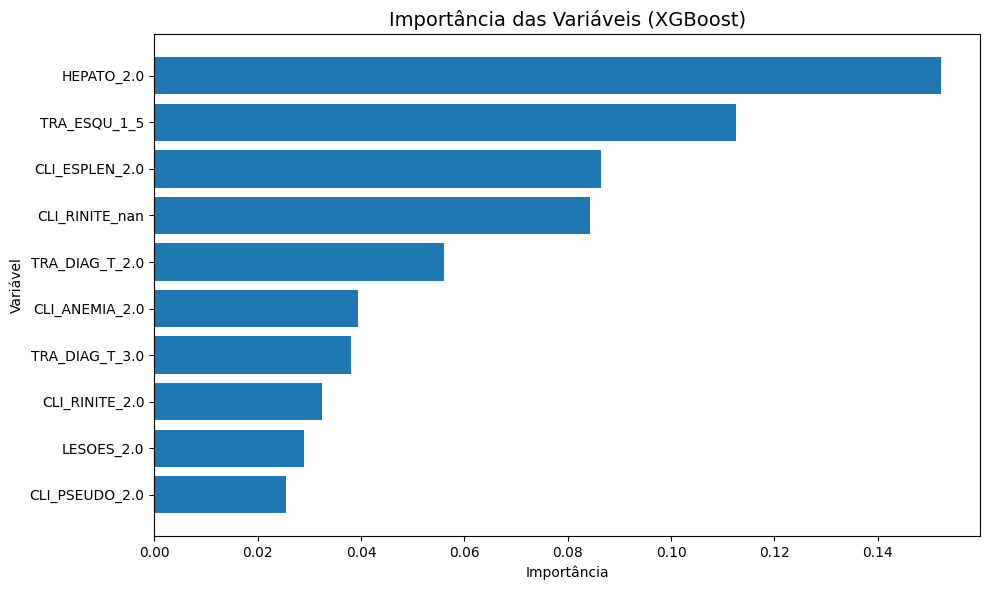

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Extrair modelo interno
xgb_final = best_model.named_steps['xgbclassifier']

# Obter importâncias e nomes originais
importances = xgb_final.feature_importances_
feature_names = X_resampled.columns

# Criar dataframe ordenado
importance_df = pd.DataFrame({
    'Variável': feature_names,
    'Importância': importances
}).sort_values(by='Importância', ascending=False)

# Exibir tabela
print(importance_df.head(15))

# Plotar gráfico com nomes reais
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variável'].head(10), importance_df['Importância'].head(10))
plt.gca().invert_yaxis()
plt.title('Importância das Variáveis (XGBoost)', fontsize=14)
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()
